This project analyzes the performance of five major technology stocks: Apple (AAPL), Amazon (AMZN), Google (GOOGL), Microsoft (MSFT), and Tesla (TSLA) from 2019 to 2024. We've examined historical data, calculated key metrics, and forecasted future stock prices using ARIMA modeling.

### Key components of our analysis:

- Historical price trends
- Correlation between stocks
- Value at Risk (VaR) calculations
- ARIMA forecasting
- Summary statistics and volatility measures

Our analysis provides insights into each stock's performance, risk profile, and potential future trends, aiding in informed investment decisions.


## Loading and Preparing Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

df = pd.read_csv('major-tech-stock-2019-2024.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)


print(df.head())
print("\
Dataset Info:")
print(df.info())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.793785  148158800   
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.029243  365248800   
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.481926  234428400   
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.402950  219111200   
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.077847  164101200   

           Ticker  
Date               
2019-01-02   AAPL  
2019-01-03   AAPL  
2019-01-04   AAPL  
2019-01-07   AAPL  
2019-01-08   AAPL  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6290 entries, 2019-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6290 non-null   float64
 1   High       6290 non-null   float64
 

Trend Analysis of Stock Prices 

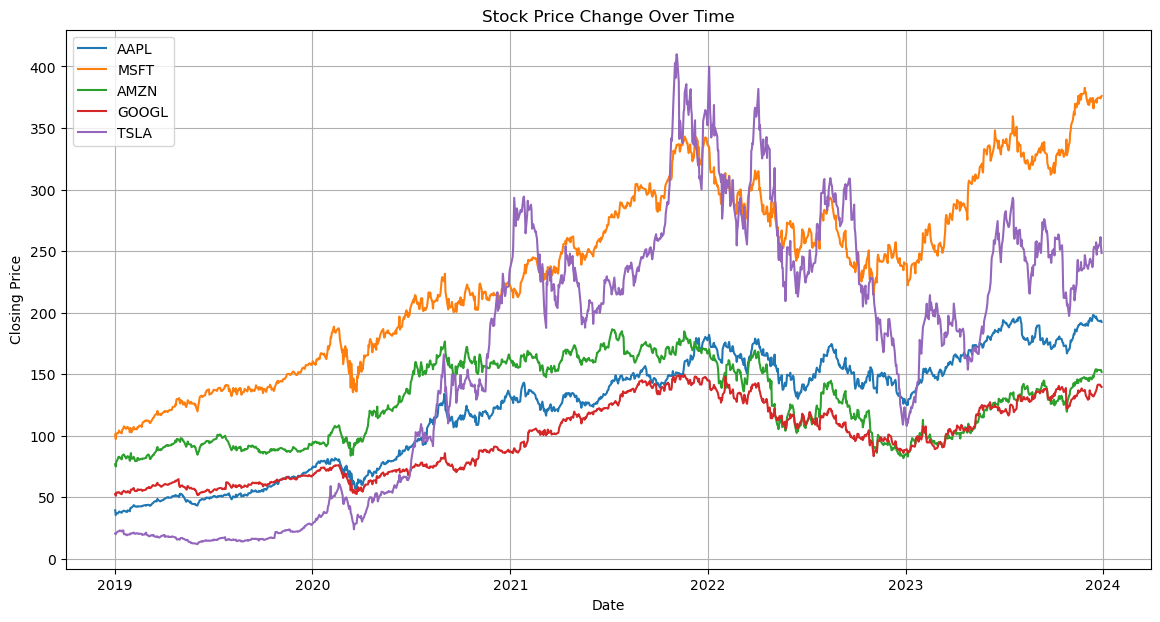

In [10]:
# Plot the closing prices over time for each stock
tickers = df['Ticker'].unique()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    stock_data = df[df['Ticker'] == ticker]
    plt.plot(stock_data.index, stock_data['Close'], label=ticker)

plt.title('Stock Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

Analyzing the daily returns and moving averages for the stocks


Average Daily Returns:
Ticker
AAPL     0.001468
AMZN     0.000787
GOOGL    0.000976
MSFT     0.001230
TSLA     0.002810
Name: Daily Return, dtype: float64


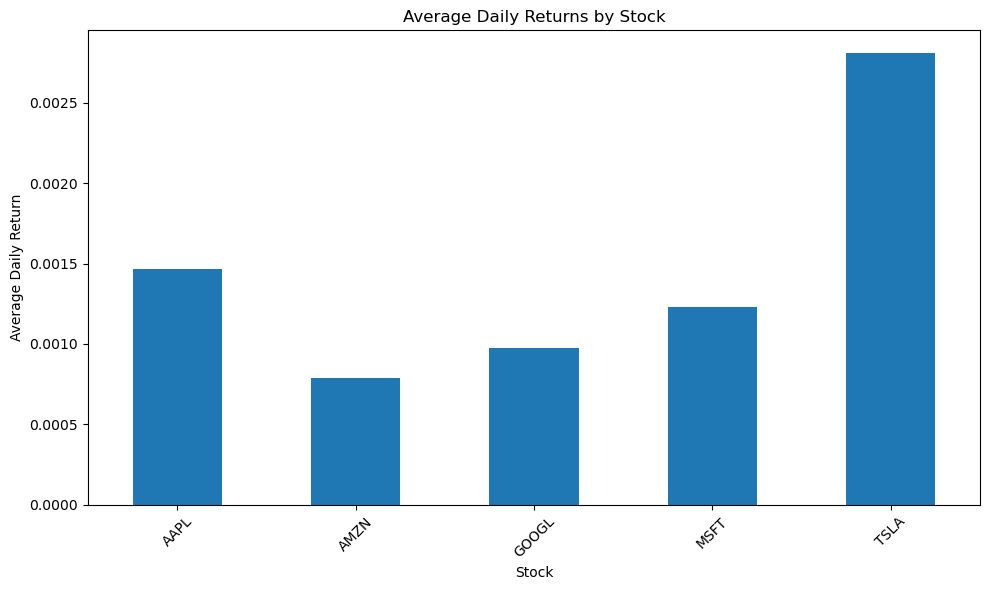

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily returns
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

# Calculate average daily return for each stock
avg_daily_returns = df.groupby('Ticker')['Daily Return'].mean()

print("Average Daily Returns:")
print(avg_daily_returns)

# Plot average daily returns
plt.figure(figsize=(10, 6))
avg_daily_returns.plot(kind='bar')
plt.title('Average Daily Returns by Stock')
plt.xlabel('Stock')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate 20-day moving average
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)



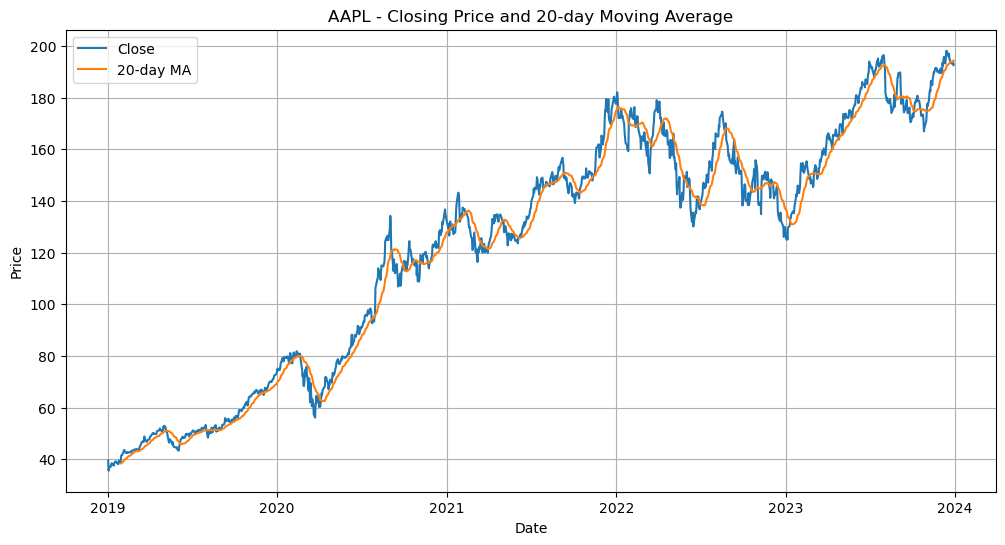

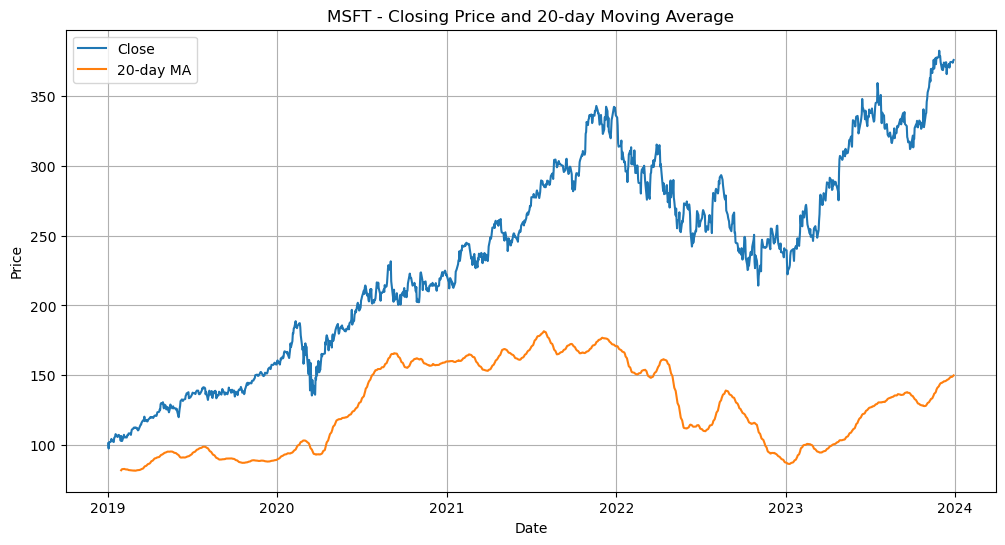

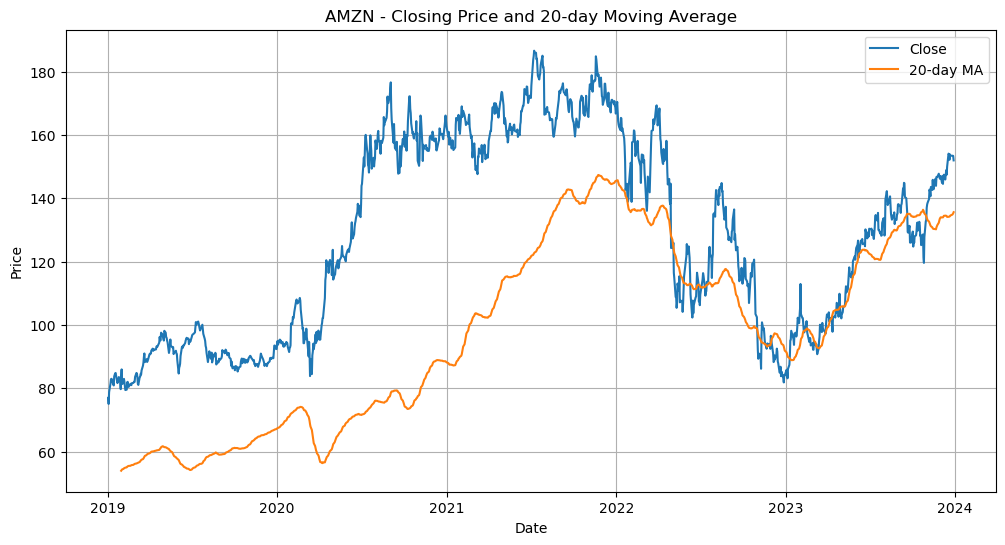

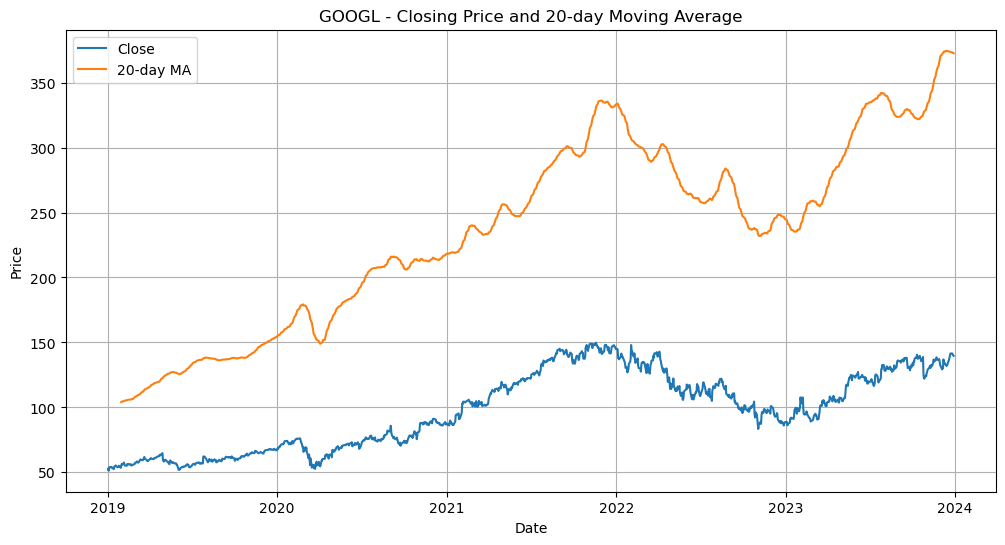

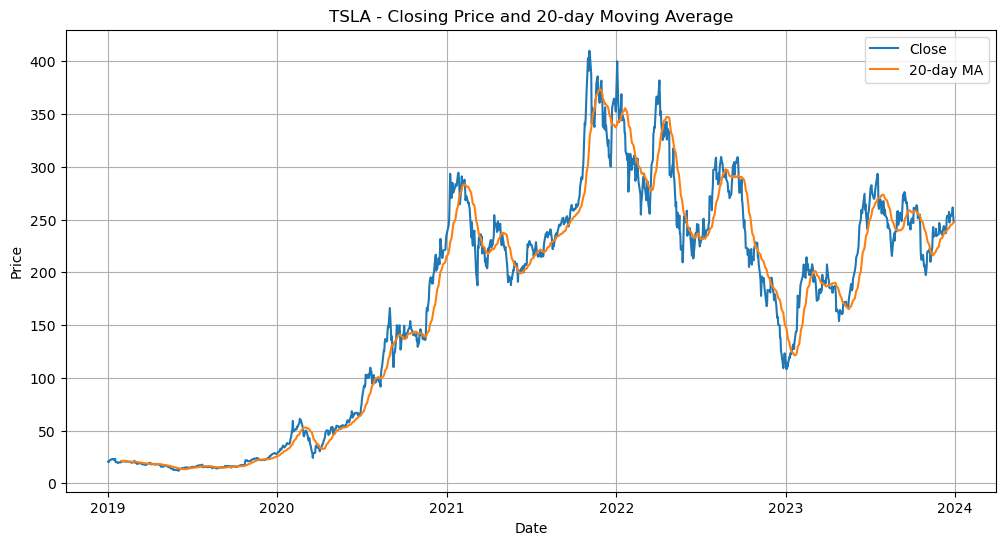

Analysis complete. Moving averages have been plotted for each stock.


In [14]:
# Plot closing prices and moving averages for each stock
for ticker in df['Ticker'].unique():
    plt.figure(figsize=(12, 6))
    stock_data = df[df['Ticker'] == ticker]
    plt.plot(stock_data.index, stock_data['Close'], label='Close')
    plt.plot(stock_data.index, stock_data['MA20'], label='20-day MA')
    plt.title(f'{ticker} - Closing Price and 20-day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

print("Analysis complete. Moving averages have been plotted for each stock.")

Correlation between daily returns of different stocks? and how much value do we put at risk by investing in a particular stock

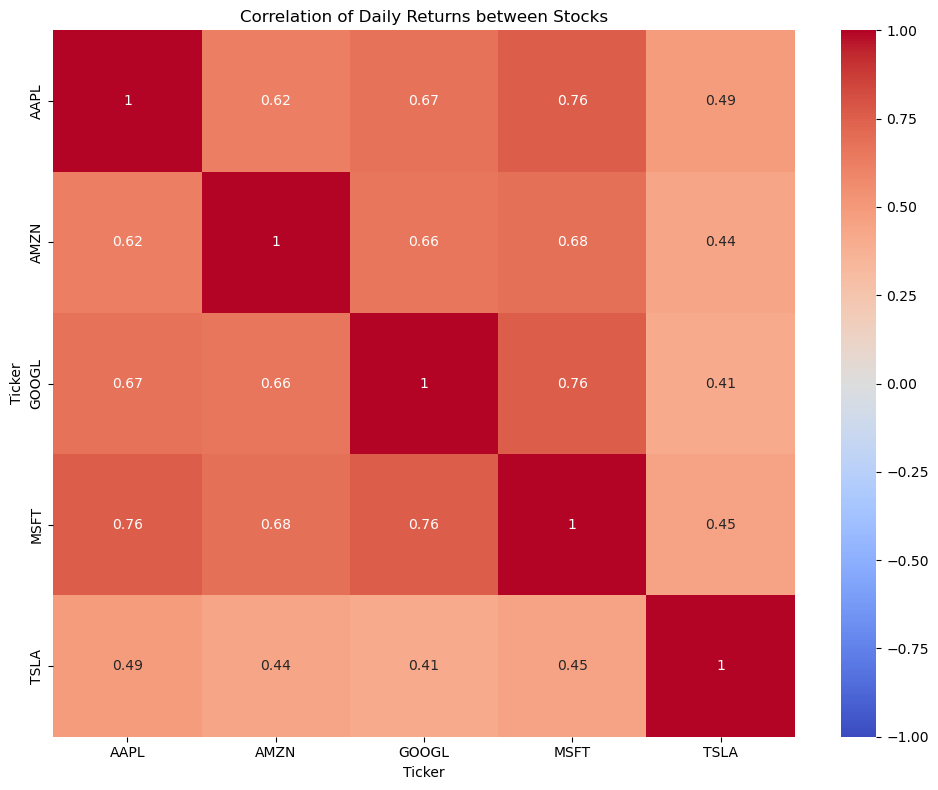

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation between daily returns
daily_returns = df.pivot(columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation of Daily Returns between Stocks')
plt.tight_layout()
plt.show()



Value at Risk (95% confidence level):
Ticker
AAPL    -0.030693
AMZN    -0.033209
GOOGL   -0.030233
MSFT    -0.029083
TSLA    -0.061672
Name: 0.050000000000000044, dtype: float64


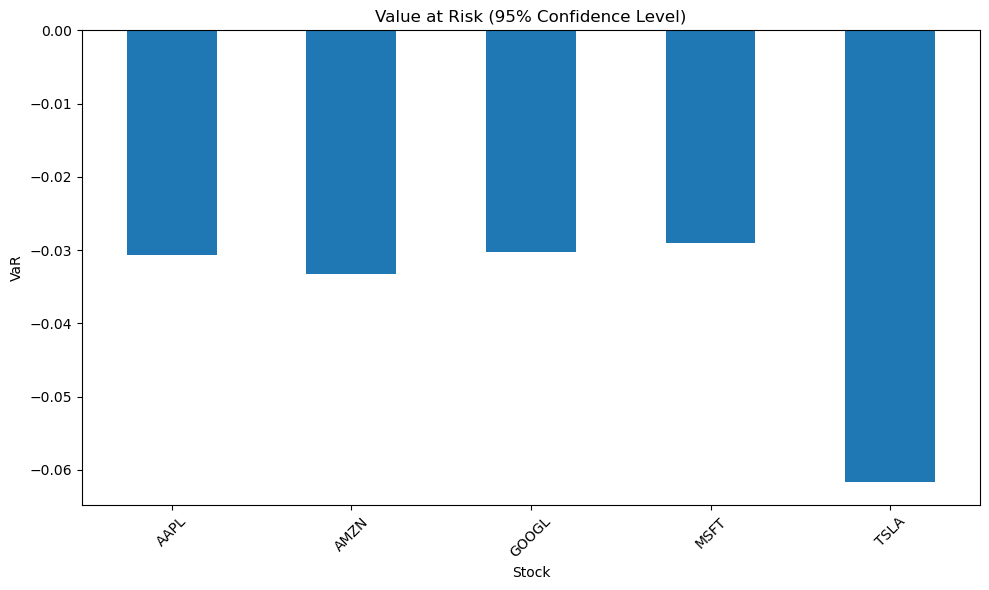

Analysis complete. Correlation heatmap and VaR have been plotted.


In [20]:
# Calculate Value at Risk (VaR) for each stock
confidence_level = 0.95
var_95 = daily_returns.quantile(1 - confidence_level)

print("Value at Risk (95% confidence level):")
print(var_95)

# Plot VaR
plt.figure(figsize=(10, 6))
var_95.plot(kind='bar')
plt.title('Value at Risk (95% Confidence Level)')
plt.xlabel('Stock')
plt.ylabel('VaR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Analysis complete. Correlation heatmap and VaR have been plotted.")

The VaR represents the maximum daily loss we can expect with 95% confidence. For example, AAPL's VaR of -0.0307 means there's a 5% chance of losing 3.07% or more in a single day.

## Predicting Stock Behaviour

We implement a simple forecasting model using ARIMA (AutoRegressive Integrated Moving Average) for modeling 

  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\SIVUYILE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginnin

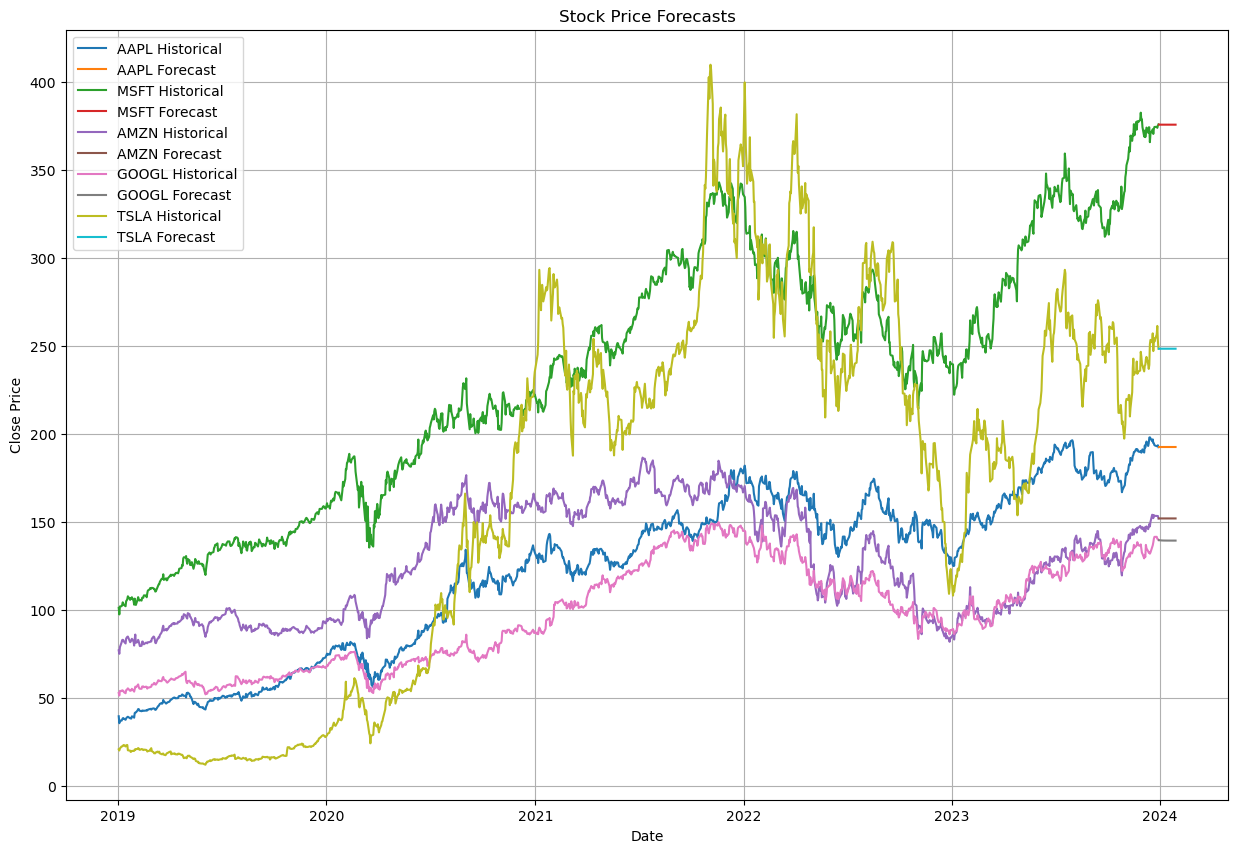

Forecasts for all stocks have been plotted.
Summary Statistics:
              mean         std        min         max
Ticker                                               
AAPL    123.031085   46.527387  35.547501  198.110001
AMZN    127.649705   31.209475  75.014000  186.570496
GOOGL    98.193006   29.692289  51.273499  149.838501
MSFT    236.259849   72.388476  97.400002  382.700012
TSLA    170.887469  108.304521  11.931333  409.970001
Average Daily Returns:
Ticker
AAPL     0.001468
AMZN     0.000787
GOOGL    0.000976
MSFT     0.001230
TSLA     0.002810
Name: Daily Return, dtype: float64
Volatility (Standard Deviation of Daily Returns):
Ticker
AAPL     0.020311
AMZN     0.022187
GOOGL    0.020038
MSFT     0.019220
TSLA     0.040757
Name: Daily Return, dtype: float64


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

def forecast_stock(stock_data, ticker):
    model = ARIMA(stock_data, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=30)
    return forecast

plt.figure(figsize=(15, 10))

for ticker in tqdm(df['Ticker'].unique()):
    stock_data = df[df['Ticker'] == ticker]['Close']
    forecast = forecast_stock(stock_data, ticker)
    
    plt.plot(stock_data.index, stock_data, label=f'{ticker} Historical')
    plt.plot(pd.date_range(start=stock_data.index[-1], periods=31)[1:], forecast, label=f'{ticker} Forecast')

plt.title('Stock Price Forecasts')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasts for all stocks have been plotted.")

# Calculate and print summary statistics
summary_stats = df.groupby('Ticker')['Close'].agg(['mean', 'std', 'min', 'max'])
print("\
Summary Statistics:")
print(summary_stats)

# Calculate and print average daily returns
avg_daily_returns = df.groupby('Ticker')['Daily Return'].mean()
print("\
Average Daily Returns:")
print(avg_daily_returns)

# Calculate and print volatility (standard deviation of daily returns)
volatility = df.groupby('Ticker')['Daily Return'].std()
print("\
Volatility (Standard Deviation of Daily Returns):")
print(volatility)

### Insights and Recommendations:

- **AAPL:** Shows moderate volatility with a relatively stable average daily return. It's a good option for investors seeking steady growth.

- **AMZN:** Has slightly higher volatility than AAPL but offers a lower average daily return. It might be suitable for investors looking for a balance between risk and return.

- **GOOGL:** Similar to AAPL in terms of volatility and average daily return, making it another stable investment choice.

- **MSFT:** Offers a good balance of high average daily return and low volatility, making it an attractive option for risk-averse investors.

- **TSLA:** Exhibits the highest volatility and average daily return, indicating a high-risk, high-reward investment. Suitable for investors with a higher risk tolerance.

### Recommendations:

- **Diversification:** Consider diversifying your portfolio by including a mix of these stocks to balance risk and return.
- **Risk Tolerance:** Align your investment choices with your risk tolerance. For lower risk, consider AAPL, GOOGL, or MSFT. For higher risk, TSLA might be more suitable.
- **Market Trends:** Keep an eye on market trends and external factors that could impact these stocks, such as economic indicators and industry developments.
